<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
#Deafult XGBoost model
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [6]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [7]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [9]:
print(confusion_matrix(y_test, y_pred))

[[38  4]
 [ 2 70]]


In [10]:
#Early Stoping (overfiting control)
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth':3,
    'eta': 0.05,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'seed':42
}

modelr = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    early_stopping_rounds=20,
    evals=[(dtest, 'evals')]
)

[0]	evals-logloss:0.61998
[1]	evals-logloss:0.58407
[2]	evals-logloss:0.55308
[3]	evals-logloss:0.52111
[4]	evals-logloss:0.49336
[5]	evals-logloss:0.46991
[6]	evals-logloss:0.44662
[7]	evals-logloss:0.42700
[8]	evals-logloss:0.40812
[9]	evals-logloss:0.38873
[10]	evals-logloss:0.37315
[11]	evals-logloss:0.35956
[12]	evals-logloss:0.34400
[13]	evals-logloss:0.33070
[14]	evals-logloss:0.31943
[15]	evals-logloss:0.30855
[16]	evals-logloss:0.29694
[17]	evals-logloss:0.28669
[18]	evals-logloss:0.27650
[19]	evals-logloss:0.26679
[20]	evals-logloss:0.25829
[21]	evals-logloss:0.25002
[22]	evals-logloss:0.24288
[23]	evals-logloss:0.23533
[24]	evals-logloss:0.22907
[25]	evals-logloss:0.22305
[26]	evals-logloss:0.21658
[27]	evals-logloss:0.21108
[28]	evals-logloss:0.20634
[29]	evals-logloss:0.20078
[30]	evals-logloss:0.19688
[31]	evals-logloss:0.19210
[32]	evals-logloss:0.18646
[33]	evals-logloss:0.18213
[34]	evals-logloss:0.17843
[35]	evals-logloss:0.17435
[36]	evals-logloss:0.16995
[37]	evals-

In [11]:
y_prob = modelr.predict(dtest)

y_pred = (y_prob >=0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9649122807017544


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
print(modelr.best_iteration)
print(modelr.best_score)

180
0.08808746373050094


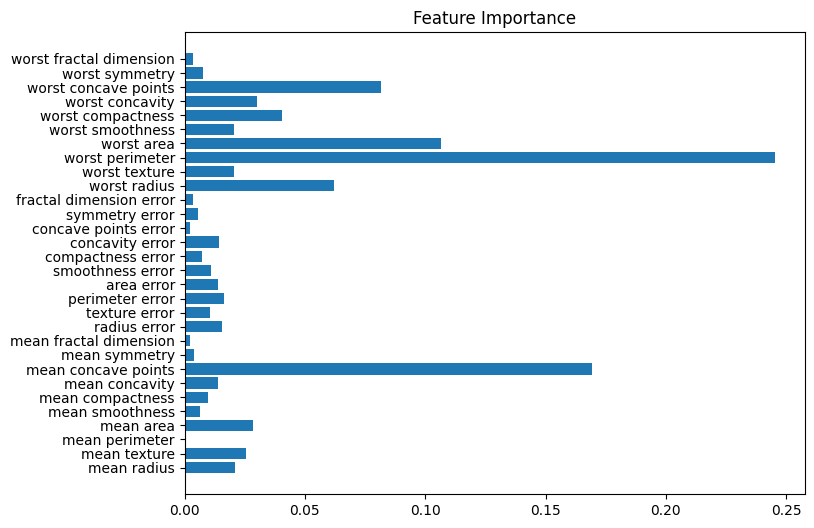

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()